### Chapter 3: Classification
Notes for *Hands on Machine Learning with Scikit by Aurelien Geron*. This is on Chapter 3: Classification, where it explains the fundamentals on how Machine Learning identify one group from the other using statistics.

# Getting Started
The dataset used is the *MNIST*, which is a collection of handwritten numbers in the format of image pixels. The goal is to have the machine tell us what number is in each image.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

You can download a copy of the dataset from sklearn. This gets updated often, which is why it is different on the book.

In [2]:
df, target = mnist["data"], mnist["target"]

There are 2 sets of data. *Data* contains the pixel information about the number image, which is what we will use to predict. *Target* are the answer keys, which tells us what the number is.

In [3]:
print('data', df.shape) # I store the data info in df, which is short for dataframe.
print('target', target.shape) 

data (70000, 784)
target (70000,)


In [4]:
df.iloc[0].describe()

count    784.000000
mean      35.108418
std       79.699674
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      255.000000
Name: 0, dtype: float64

There are 70,000 numbers in the dataset and each number holds 784 pixels. Each pixel has a value between 0 to 255, which indicates the intensity of the black color. 

## Split Train Test
Before we begin, we set aside a portion of the dataset into a *Test* set, which is what we use at the very end to validate our models. We use the *Train* for majority of our exploration and data engineering.

In [5]:
train_df, test_df, train_target, test_target = df[:60000], df[60000:], target[:60000], target[60000:]

The MINST dataset is already dividied into Train and Test. The first 60k rows is the Train and the rest are the Test.

In [24]:
import numpy as np
shuffle_index = np.random.RandomState(seed=42).permutation(60000)
train_df, train_target = train_df.iloc[shuffle_index], train_target.iloc[shuffle_index]

There is a chance that the numbers are in order in a way that it will affect our models. Like a new deck of cards, we would always shuffle it before using them. Here, we shuffle it using the index.

# Explore Data
Our data is prepapred. It is time to Explore, Clean and Machine Learning the shit out of it. 

I don't restrict myself from exploring the data but I do keep everything organized. That is why I keep Exploring, Cleaning and Machine Learning code in separate sections in this order. This section is where we keep all our Exploring data.

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
seven = train_df.loc[59963].values

The numbers will keep shuffling everytime you run the code. Better choose a number and remember the index so you can iterate over the same number. Here I choose the number 7, which has an index of 59963 as an example.

7


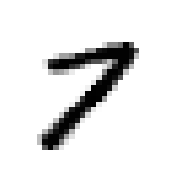

In [26]:
seven_target = train_target.loc[59963] # Choose a number and remember the index because of the shuffle.
print(seven_target)
plt.figure(figsize=(2,2))
number_seven_image = seven.reshape(28, 28)
plt.imshow(number_seven_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

Each row contains pixel information about a number. If it reshaped into 28 by 28 pixels and plotted in a graph, the image of the number will show. We have chosen the number seven and true enough the image is a seven.

# Clean Data
In this section, we Clean the data.

In [27]:
import numpy as np
train_target = train_target.astype(np.uint8)
test_target = test_target.astype(np.uint8)

The values of each targets are strings. We want them as intigers.

# Machine Learning
In this section, we do our Machine Learning algorithms. We start with an easy algorithm, then we work our way up to the more complex ones.

## Stochastic Gradient Descent
The goal is to use the pixel information in each row to tell us what number it is. But before doing all numbers, we start with something simple, which is to determine if the number is seven or not (TRUE or FALSE). For our first model, we use SGD that is great at classifying large datasets.

In [28]:
train_target_seven = (train_target == int(seven_target))

In [29]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42) # Init. Call on SGD.
sgd_clf.fit(train_df, train_target_seven) # Fit. We give instructions to Machine.
sgd_clf.predict([seven]) # Predict. Ask machine if seven is the number seven.

array([ True])

Pay attention here because this is how all Machine Learning Algorithm works:
- Init. We create an instance of the model.
- Fit. We give the Machine the data and the answer keys for it to learn.
- Predict. We then check if the Machine can tell if variable *seven* is seven. In this case, it does and it outputs the value *True*.

Now, let us check if the Machine can tell if the rest of the numbers are seven and check the accuracy.

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train_df, train_target_seven, cv=3, scoring="accuracy")

array([0.98115, 0.97325, 0.97295])

*cross_val_score* splits the training data into 3 folds and uses 2 folds as training data and 1 fold as the test. It does this 3 times in different combination. 

Results show that on average, the model is accurate around ~95% of the time. This is unusually high. Let us try another dumber model and check.

In [31]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [32]:
never_roll_clf = Never5Classifier()
cross_val_score(never_roll_clf, train_df, train_target_seven, cv=3, scoring="accuracy")

array([0.89895, 0.8912 , 0.8966 ])

Again, we get very high results. This is because ~90% of the numbers are not sevens. So, if the model says that all numbers are not sevens (All FALSE), then the accuracy would still be around ~90%. This is why accuracy, as a measure of classification, sucks.

## Confusion Matrix
Instead just counting the correct predictions, Confusion Matrix also takes into account the wrong predictions. This creates balance in the way we evaluate our models.

In [33]:
from sklearn.model_selection import cross_val_predict
train_pred_seven = cross_val_predict(sgd_clf, train_df, train_target_seven, cv=3)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_target_seven, train_pred_seven)

array([[53145,   590],
       [  863,  5402]], dtype=int64)

#### 
![confusion_matrix](image1.svg)

**Precision** is the number of times the model predicted that the number was seven versus all the predictions that it thought was seven. **Recall** is the number of times the model predicted that the number was seven versus all the actual sevens that exists in the dataset.

Precision alone is not enough to evaluate a model. If say the model had only 1 True prediction, which happens to be a seven, then your precision is 100%. Recall is also not useful either by itself. It is possible to get a 100% recall if the model predicted that ALL numbers are sevens, which gives you a Recall of 100%.

There are some use cases where you would prioritize one metric over the other but, generally, you want to have both Precision and Recall to be both high. 

In [40]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(train_target_seven, train_pred_seven)
precision

0.9015353805073432

For our model, it has a 90% precision score, which means that out 5,992 numbers that it has identified as the number seven, only 5,402 of those wer actually the number seven. This is pretty good.

In [43]:
recall = recall_score(train_target_seven, train_pred_seven)
recall

0.8622505985634478

But it has scored a recall of 86%, which means that the 5,402 correct predictions are only 86% of all actual sevens. It was not able to identify 863 that were also sevens.

## F1 score
Harmonic mean gives more weigh to low values. Regular mean will weight the 2 values equal.

In [37]:
from sklearn.metrics import f1_score
print('mean: ', (precision + recall) / 2)
print('f1: ', f1_score(train_target_seven, train_pred_seven))

mean:  0.8818929895353955
f1:  0.881455494819287


### Threshold

In [38]:
y_scores = sgd_clf.decision_function([seven])
y_scores

array([4694.93201914])

In [39]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])